# **Resume Screening Using NLP** 
### **By:** Ali Vijdaan (2022560)
### **AI-221L Project** 

##### **Importing Libraries**

In [93]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
import nltk
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix ,classification_report

In [ ]:
nltk.download('wordnet')

##### **Data Pre-processing**

In [3]:
df = pd.read_csv(r"C:\Users\alivi\Desktop\Ali Vijdaan\Jupyter Notebooks\AI-221L Project NLP\Resume Screening.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
rows, col = df.shape
print(f"Rows: {rows}")
print(f"Columns: {col}")

Rows: 962
Columns: 2


In [8]:
null_sum = df.isnull().sum()
print(null_sum)

Category    0
Resume      0
dtype: int64


In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [13]:
print(df['Resume'][0])

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

In [29]:
porter_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def dataCleaning(txt):
    CleanData = re.sub('https\S+\s', ' ', txt)  #Cleaning links via re
    CleanData = re.sub(r'\d', ' ', CleanData)   #Cleaning numbers via re
    CleanData = re.sub('@\S+', ' ', CleanData)  #Cleaning email address via re
    CleanData = re.sub('#\S+\s', ' ', CleanData)    #Cleaning # symbol via re
    CleanData = re.sub('[^a-zA-Z0-9]', ' ', CleanData)  #Cleaning special characters via re
    CleanData = remove_stopwords(CleanData) #Cleaning stopwords via genism 
    CleanData = porter_stemmer.stem(CleanData)  #Stemming via nltk 
    CleanData = lemmatizer.lemmatize(CleanData) #Lemmatization via nltk 
    return CleanData

In [39]:
df['Resume'] = df['Resume'].apply(lambda x : dataCleaning(x))

In [41]:
print(df['Resume'][0])

skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists accelerating review process run analytics generate r

##### **Label Encoding**

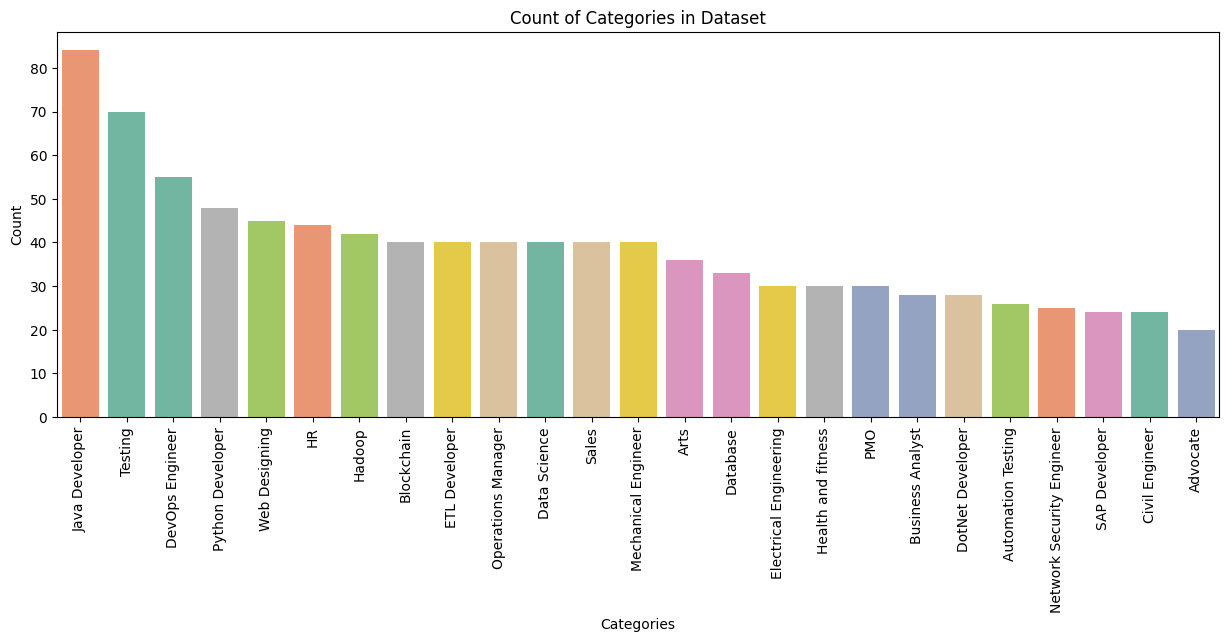

In [63]:
plt.figure(figsize = (15, 5))
sns.countplot(x='Category', data = df, order = df['Category'].value_counts().index, palette='Set2', hue = 'Category')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.xlabel('Categories')
plt.title('Count of Categories in Dataset')
plt.show()

In [62]:
le = LabelEncoder()

le.fit(df['Category'])
df['Labeled Category'] = le.transform(df['Category'])

print(df[['Category', 'Labeled Category']])


         Category  Labeled Category
0    Data Science                 6
1    Data Science                 6
2    Data Science                 6
3    Data Science                 6
4    Data Science                 6
..            ...               ...
957       Testing                23
958       Testing                23
959       Testing                23
960       Testing                23
961       Testing                23

[962 rows x 2 columns]


##### **Feature Extraction**

In [65]:
tfidf = TfidfVectorizer()

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

In [74]:
print(requiredText[:10].toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##### **Splitting Data**

In [76]:
x_train, x_test, y_train, y_test = train_test_split(requiredText, df['Labeled Category'], test_size = 0.3, random_state = 42)

train_row, train_col = x_train.shape 
test_row, test_col = x_test.shape

print(f"Training data Rows: {train_row}")
print(f"Training data Columns: {train_col}")
print(f"Testing data Rows: {test_row}")
print(f"Testing data Columns: {test_col}")

Training data Rows: 673
Training data Columns: 7202
Testing data Rows: 289
Testing data Columns: 7202


##### **Applying KNN Algorithm**

In [95]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train, y_train)
ypred_knn = clf.predict(x_test)
print(ypred_knn)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23  2  3 18 14  1 12 13 22 12 11 23 18 15 19 15  6  0 15  8  9 16  6 12
 14  9 15  4  6 20 16  7  8 23  3 23  9  6  0  6  9 14 15 24  9  3  1 15
 13  5  6 12 11 15  8 21 16  4 12  8 21 20  5  9 22 13 16 19 15  4 22 10
 23 13  2 15 15  4 17 15  6 24 23 15  3 15 23 18 18 20 23 13 10 20 11 23
  4]


##### **Applying Naive Bayes Algorithm**

In [90]:
model = OneVsRestClassifier(MultinomialNB())
model.fit(x_train, y_train)
ypred_nb = model.predict(x_test)
print(ypred_nb)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23  6 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20  6  6  7
 23  2  3 18 14  1 12 13 22 12 11 23 18 15 19 15  6  0 15  8  9 16  6 12
 14  9 15  4  0 20 16  7  8 23  3 23  9  6  0  6  9 14 15 24  9  3  1 15
 13  5  6 12 11 15  8 21 16  4 12  8 21 20  5  9 22 13 16 19 15  4 22 10
 23 13 15 15 15  4 17 15  6 24 23 15  3 15 23 18 18 20 23 13 10 20 11 23
  4]


##### **Applying SVM Algorithm**

In [92]:
model_svm = OneVsRestClassifier(SVC())
model_svm.fit(x_train, y_train)
ypred_svm = model_svm.predict(x_test)
print(ypred_svm)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23  6 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20  6  6  7
 23  2  3 18 14  1 12 13 22 12 11 23 18 15 19 15  6  0 15  8  9 16  6 12
 14  9 15  4  0 20 16  7  8 23  3 23  9  6  0  6  9 14 15 24  9  3  1 15
 13  5  6 12 11 15  8 21 16  4 12  8 21 20  5  9 22 13 16 19 15  4 22 10
 23 13  2 15 15  4 17 15  6 24 23 15  3 15 23 18 18 20 23 13 10 20 11 23
  4]


## **Comparative Analysis**

In [127]:
unique_values_df = pd.DataFrame({'Encoded Labels': df['Labeled Category'].unique(), 'Categories': df['Category'].unique()}) 
print(unique_values_df.to_string(index = False)) 

 Encoded Labels                Categories
              6              Data Science
             12                        HR
              0                  Advocate
              1                      Arts
             24             Web Designing
             16       Mechanical Engineer
             22                     Sales
             14        Health and fitness
              5            Civil Engineer
             15            Java Developer
              4          Business Analyst
             21             SAP Developer
              2        Automation Testing
             11    Electrical Engineering
             18        Operations Manager
             20          Python Developer
              8           DevOps Engineer
             17 Network Security Engineer
             19                       PMO
              7                  Database
             13                    Hadoop
             10             ETL Developer
              9          DotNet De

##### **KNN Confusion Matrix**

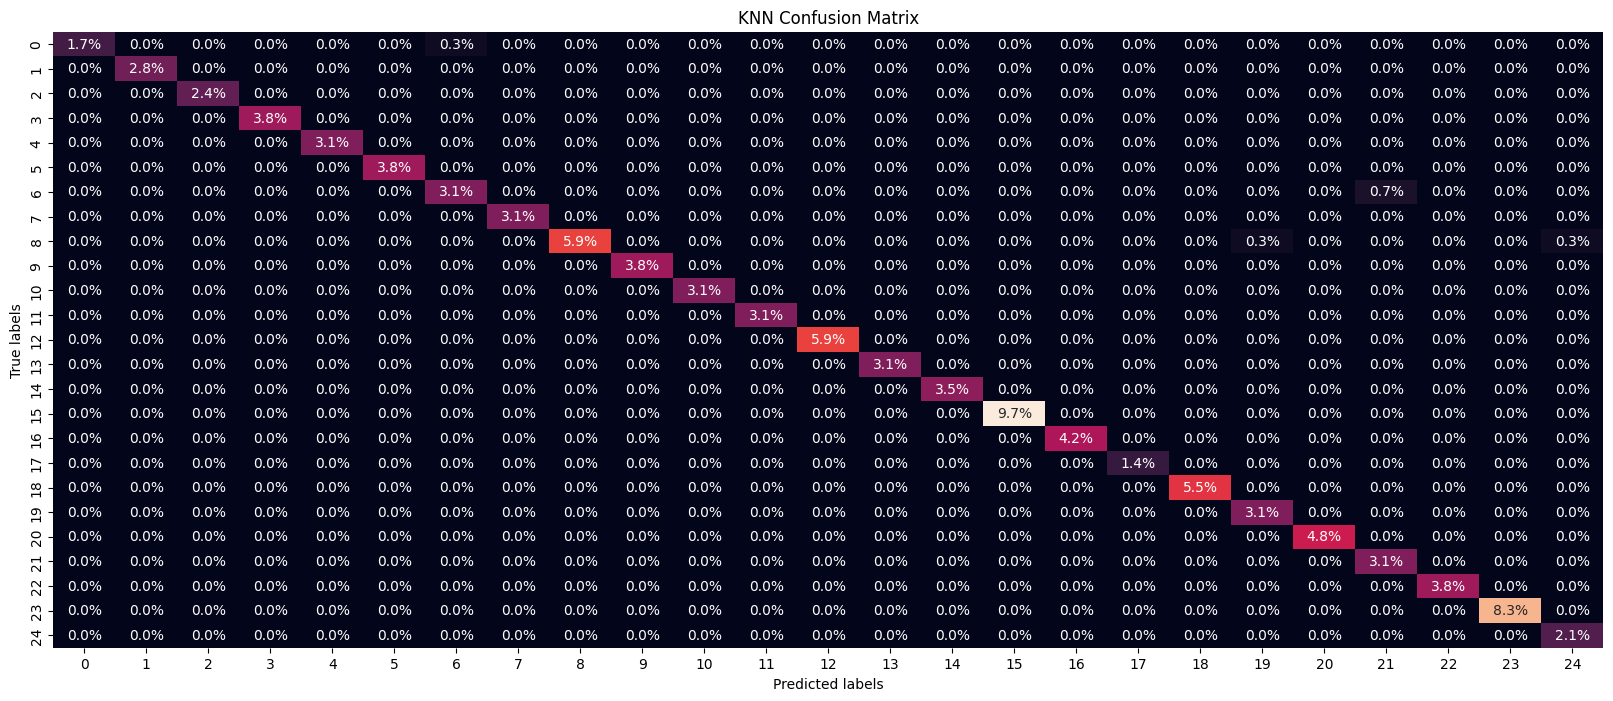

In [105]:
cm_knn = confusion_matrix(y_test, ypred_knn)
plt.figure(figsize=(20, 8))
sns.heatmap(cm_knn / np.sum(cm_knn), annot=True, fmt='.1%', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('KNN Confusion Matrix')
plt.show()

##### **Naive Bayes Confusion Matrix**

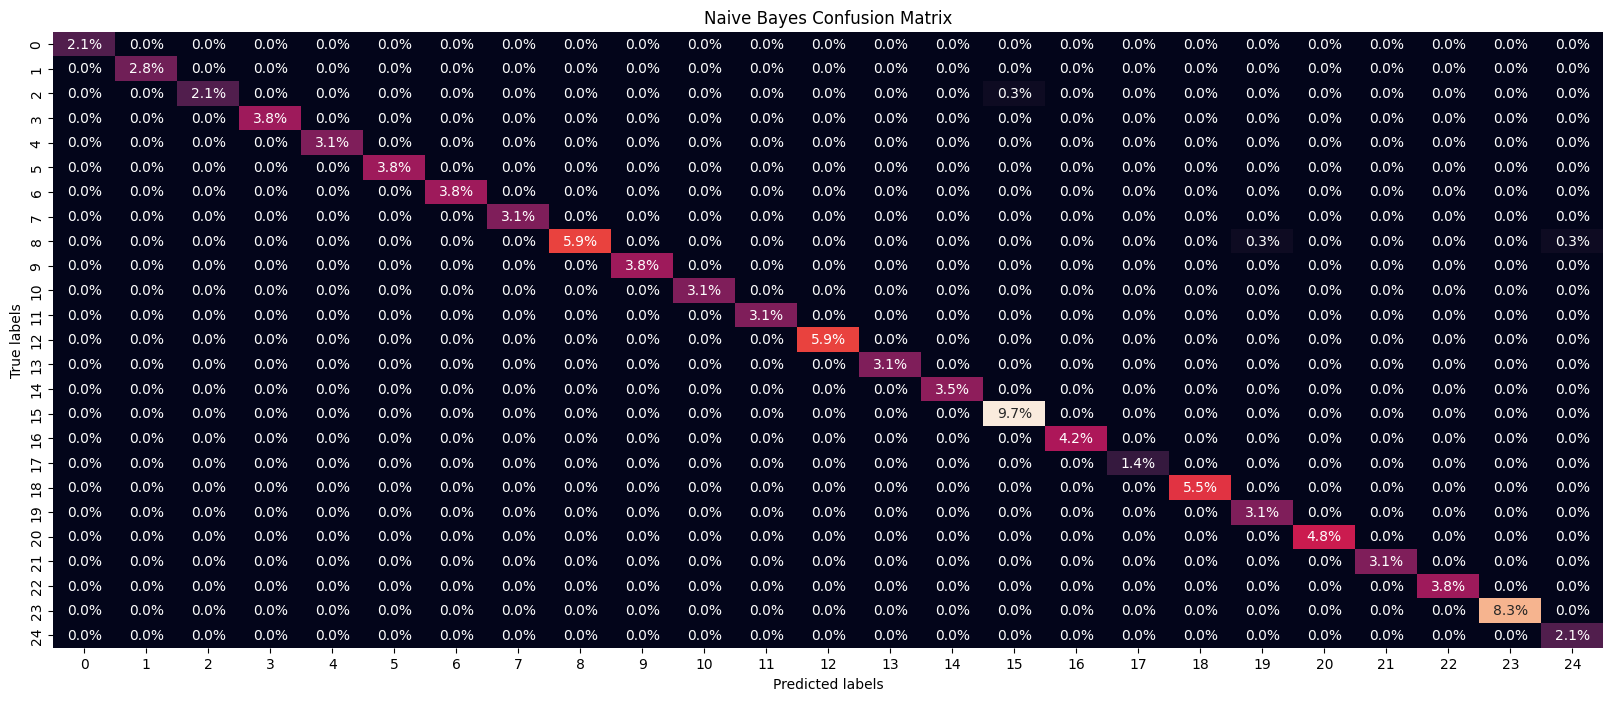

In [110]:
cm_nb = confusion_matrix(y_test, ypred_nb)
plt.figure(figsize=(20, 8))
sns.heatmap(cm_nb / np.sum(cm_nb), annot=True, fmt='.1%', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

##### **SVM Confusion Matrix** 

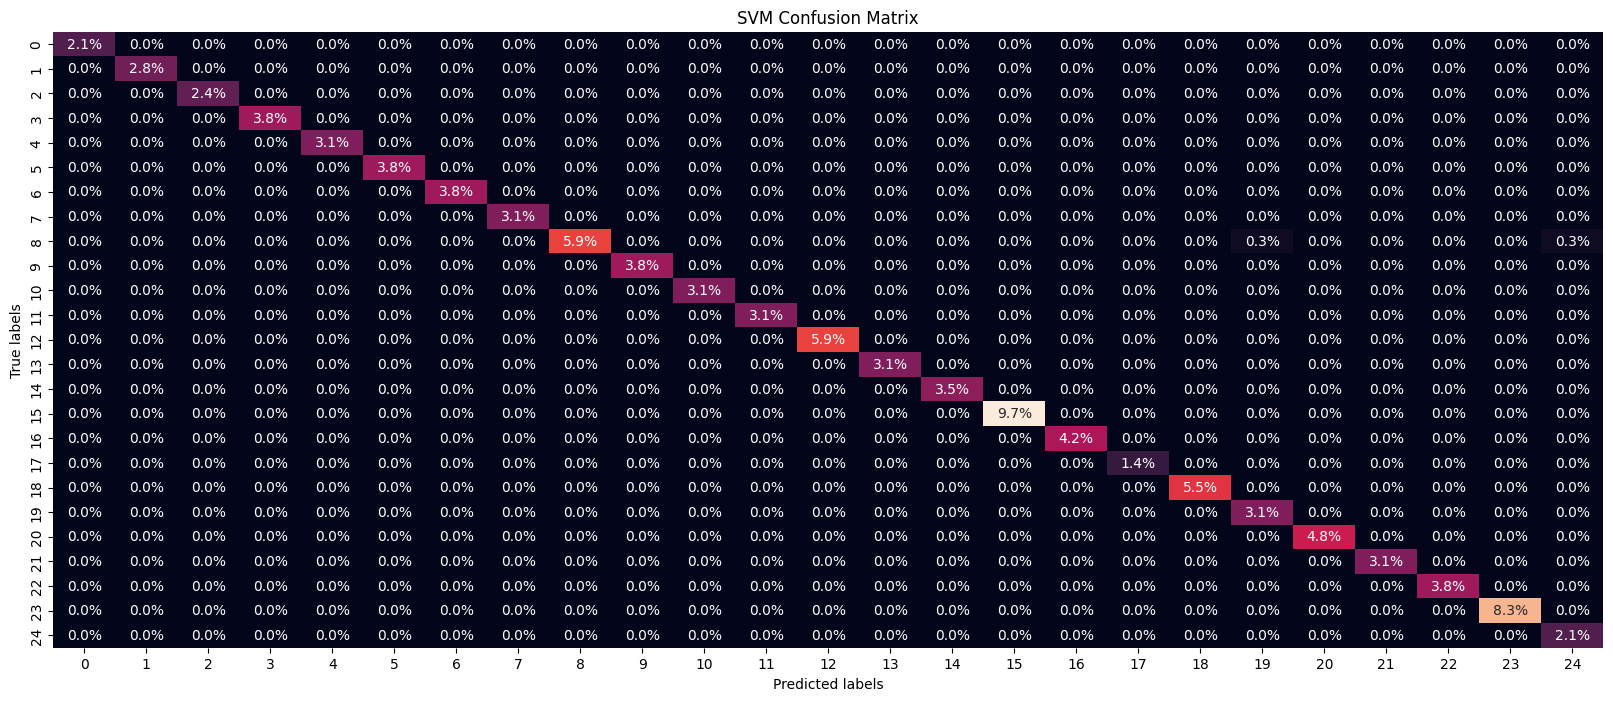

In [112]:
cm_svm = confusion_matrix(y_test, ypred_svm)
plt.figure(figsize=(20, 8))
sns.heatmap(cm_svm / np.sum(cm_svm), annot=True, fmt='.1%', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Confusion Matrix')
plt.show()

##### **Classification Report**

In [114]:
knn_accuracy = clf.score(x_test, y_test) * 100
nb_accuracy = model.score(x_test, y_test) * 100
svm_accuracy = model_svm.score(x_test, y_test) * 100

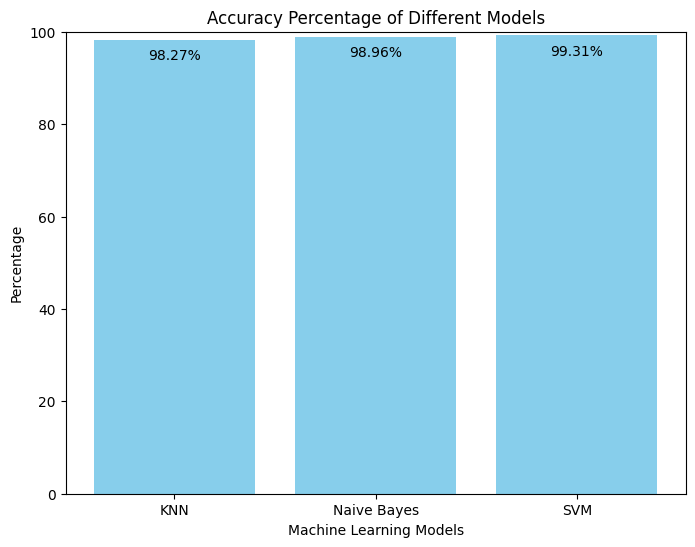

In [117]:
ml_models = ['KNN', 'Naive Bayes', 'SVM']
ml_perc = [ knn_accuracy, nb_accuracy, svm_accuracy]

plt.figure(figsize=(8, 6))
bars = plt.bar(ml_models, ml_perc, color='skyblue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Percentage')
plt.title('Accuracy Percentage of Different Models')
plt.ylim(0, 100) 

for bar, ml_perc in zip(bars, ml_perc):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{round(ml_perc, 2)}%', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

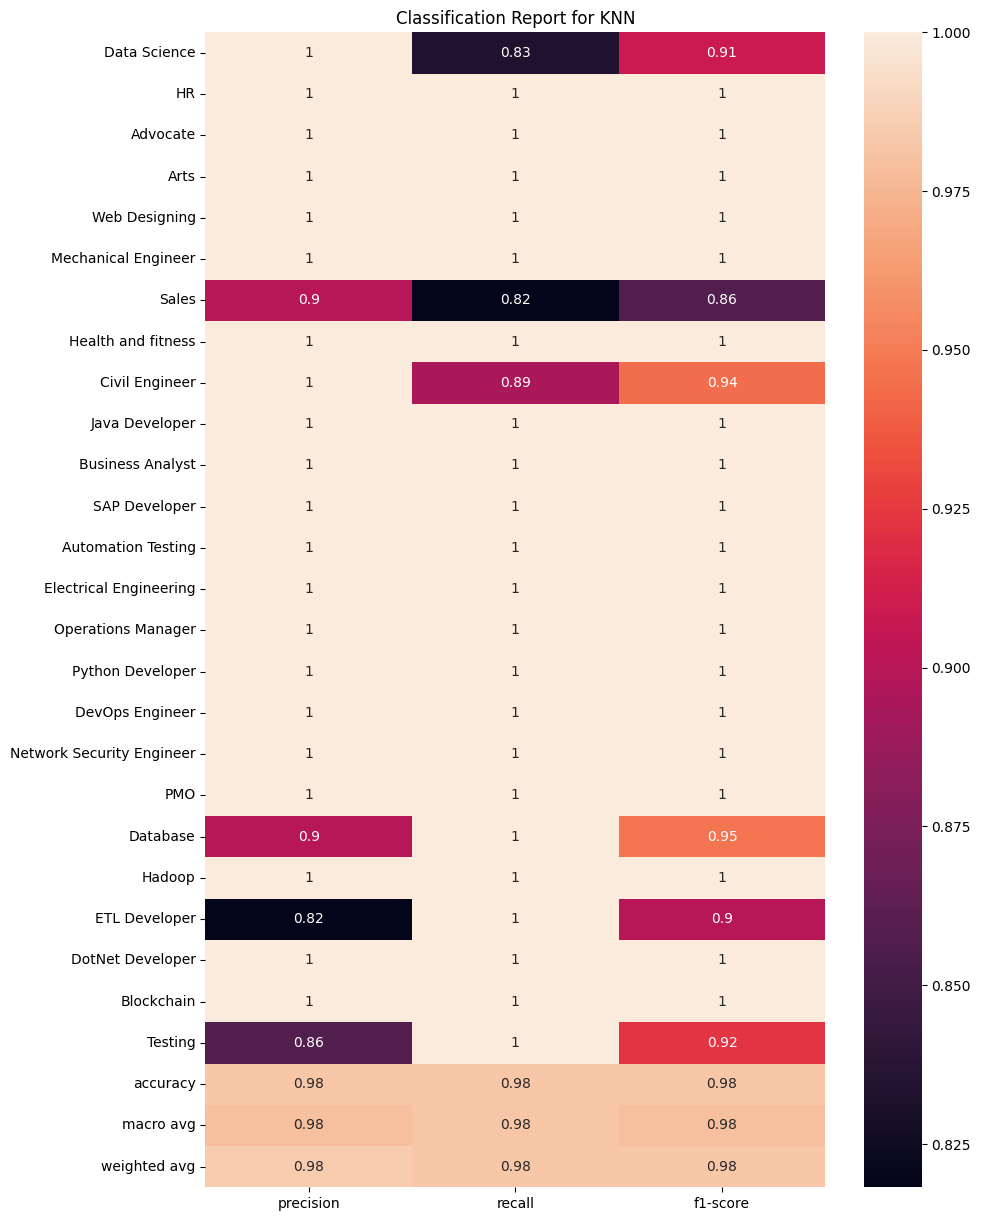

In [124]:
clf_report = classification_report(y_test, ypred_knn, target_names = df['Category'].unique(), output_dict=True)
plt.figure(figsize=(10, 15))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

plt.title('Classification Report for KNN')
plt.show()

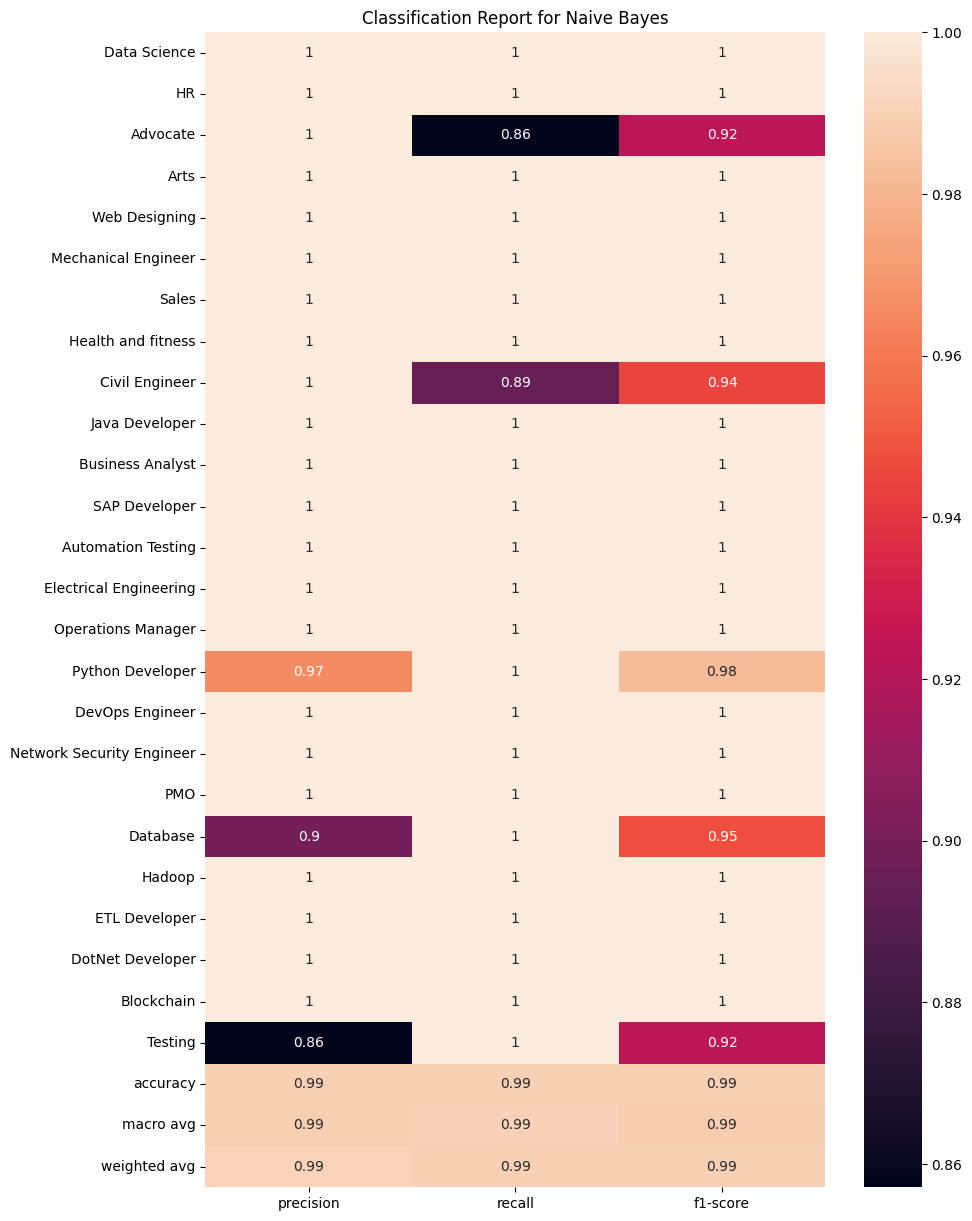

In [125]:
clf_report = classification_report(y_test, ypred_nb, target_names = df['Category'].unique(), output_dict=True)
plt.figure(figsize=(10, 15))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

plt.title('Classification Report for Naive Bayes')
plt.show()

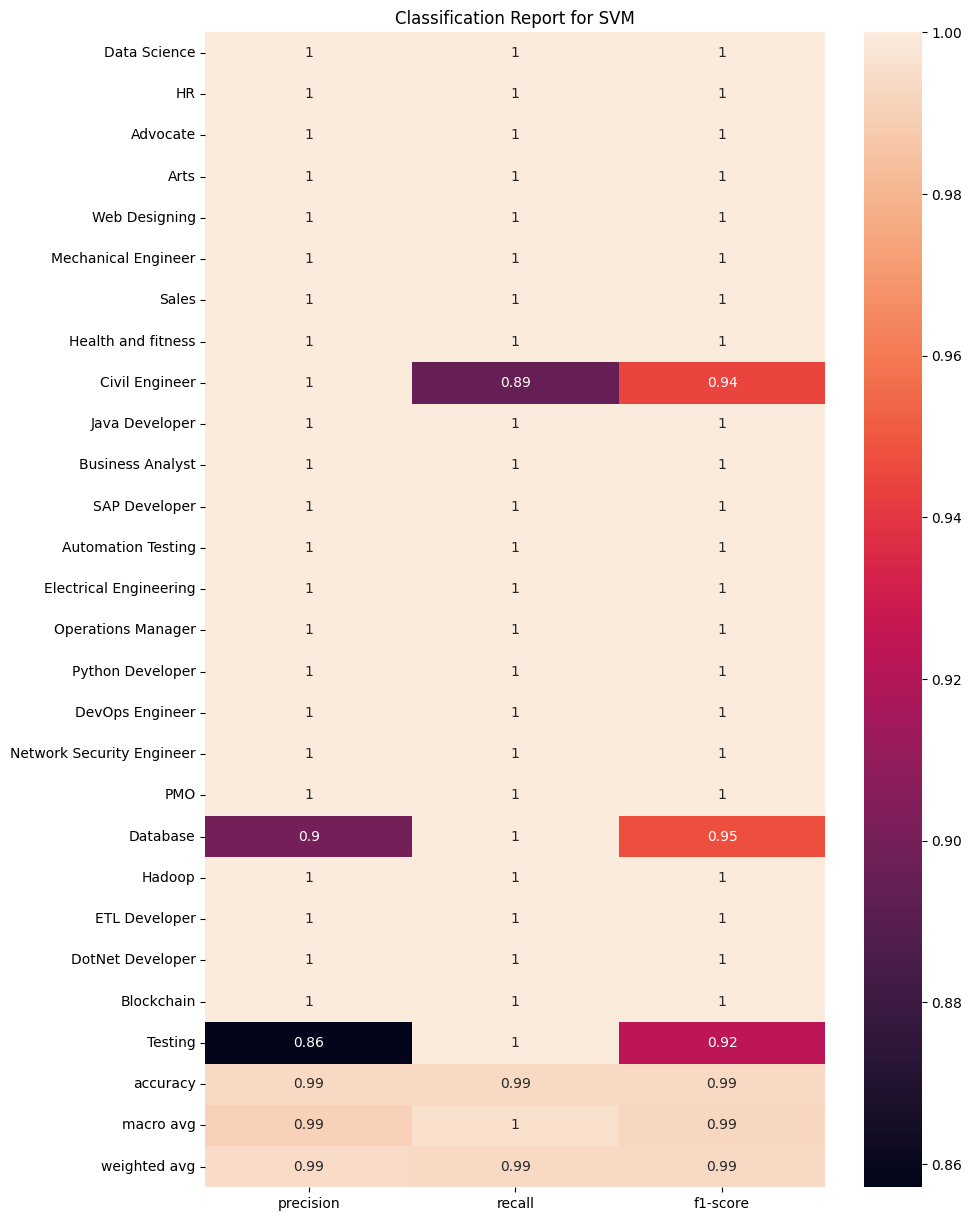

In [126]:
clf_report = classification_report(y_test, ypred_svm, target_names = df['Category'].unique(), output_dict=True)
plt.figure(figsize=(10, 15))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

plt.title('Classification Report for SVM')
plt.show()

### **Prediction System Via Pickle**

In [130]:
import pickle 
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(model_svm, open('model_svm.pkl', 'wb'))

In [133]:
# Random Data Science CV taken from Internet

example = """Elena Hernandez (321) 987-6543 e.hernandez@email.com 552 Fourth Boulevard, Buffalo, NY 45678 Profile A Senior Data Scientist with 10+ years of experience using machine learning, Big Data, and deep learning to deliver data-driven solutions for enterprise organizations. A proven track record of creating dynamic machine learning algorithms to enhance data visualization and drive positive business outcomes. Professional Experience
Senior Data Scientist, Omicron Biotech, Buffalo, NY
January 2012 – Present
Collect, study, and interpret large datasets of research results to enhance data-driven decision making for a $100M biotechnology company and develop advanced machine learning models
Oversee a 20-person business intelligence team, manage data analytics on an enterprise scale, and ensure appropriate implementation of statistical analysis, predictive modeling, and deep learning approaches
Communicate data using a variety of visualization approaches, including Power BI and Tableau
Data Scientist, Kappa Corporation, Albany, NY
July 2009 – December 2011
Led big data machine learning initiative to develop and deploy algorithms, which enhanced data visualization and supported a 200% increase in business growth over three years
Developed model to accurately predict fraud activity, resulting in a 75% decrease in company losses
Utilized R, Python and SAS to link data collected on-platform and off-platform to create thorough datasets that predict successful product development initiatives
Education
Master of Science in Data Science
New York University, New York, NY, September 2007 – June 2009
Bachelor of Arts in Computer Science
University of California – Berkeley, Berkeley, CA, September 2003 – June 2007
Key Skills
Experience leading multi-disciplinary teams
Coding skills in R, Python, C++, Java
Big data, data mining and data visualization
Risk analysis and problem solving skills
MySQL and JSON
Certifications
Microsoft Certified Solutions Expert, 2019
SAS Certified Big Data Professional, 2017"""

In [134]:
clf = pickle.load(open('clf.pkl', 'rb'))

cleaned_resume = dataCleaning(example)

input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

category_mapping = {

    6 : "Data Science",
    12 : "HR", 
    0 : "Advocate",
    1 : "Arts",
    24 : "Web Designing",
    16 : "Mechanical Engineer",
    22 : "Sales",
    14 : "Health and fitness",
    5 : "Civil Engineer",
    15 : "Java Developer",
    4 : "Business Analyst",
    21 : "SAP Developer",
    2 : "Automation Testing",
    11 : "Electrical Engineering",
    18 : "Operations Manager",
    20 : "Python Developer",
    8 : "DevOps Engineer",
    17 : "Network Security Engineer",
    19 : "PMO",
    7 : "Database",
    13 : "Hadoop",
    10 : "ETL Developer",
    9 : "DotNet Developer",
    3 : "Blockchain",
    23 : "Testing"
}

category_name = category_mapping.get(prediction_id, "Unknown")
print("Predicted Category: ", category_name)

Predicted Category:  Data Science
